In [2]:
# changing cwd
%cd ..

c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp


## Load packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
# from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import seaborn as sns
# from numba import jit, cuda # currently only for testing

# colors = sns.diverging_palette(240, 10, n=2) # red to blue
colors = sns.diverging_palette(150, 275, s=80, l=55, n=2) #green to purple
colors[0], colors[1] = colors[1], colors[0] # switch colors
cmap = 'PRGn'

from datetime import datetime
import os
from os import path
from tqdm.notebook import tqdm #compatible with jupyter
!jupyter nbextension enable --py widgetsnbextension --sys-prefix

FILEPATH = os.path.join(os.getcwd(), 'figs\\')
CLFPATH = os.path.join(os.getcwd(), 'clf\\')

# from scipy.stats import norm

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [4]:
from src.inductive_bias import IB
ib = IB() #instantiate inductive bias package

## Time and Date of the experiment

In [4]:
print(ib.date)

2021-03-22 02:33:21.029357


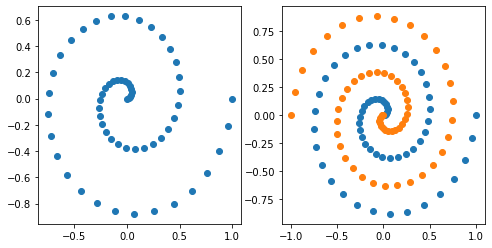

In [5]:
fig, ax = plt.subplots(1,2, figsize=(8,4))

# a,b = spiral_center(120, rng=1)
a,b = ib.spiral
ax[0].scatter(a[:,0],a[:,1])
ax[1].scatter(a[:,0],a[:,1])
ax[1].scatter(b[:,0],b[:,1])

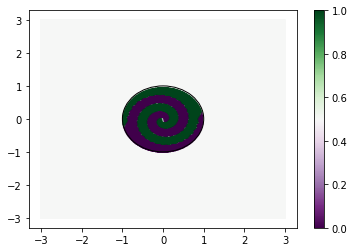

In [6]:
tx, ty, tc = ib.get_trueSpiral(-3,3,0.01,0.00008,rng=1,cc=True) #sig cannot go lower than 0.00008

fig, ax = plt.subplots()

mlp = ax.scatter(tx,ty, c=tc, s=1, cmap='PRGn')
fig.colorbar(mlp)
ax.add_patch(Circle((0,0), radius=1, edgecolor='k', fill=False))

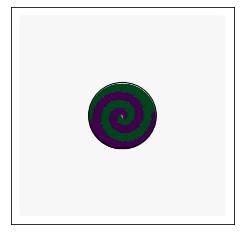

In [7]:
fig, ax = plt.subplots(figsize=(4,4))

mlp = ax.scatter(tx,ty, c=tc, s=1, cmap='PRGn')
# fig.colorbar(mlp)
ax.set_xticks([])
ax.set_yticks([])
ax.add_patch(Circle((0,0), radius=1, edgecolor='k', fill=False))

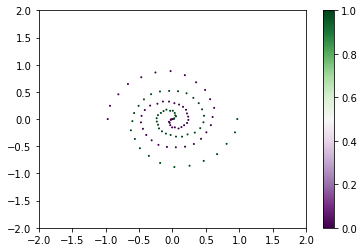

In [4]:
a, b, c, d, e, f, g = ib.get_testpdfSpiral(100, noise=0, K=2)#generate_spirals(750, K=2)

plt.scatter(a[:,0],a[:,1], c=c, cmap=cmap, s=1)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.colorbar()

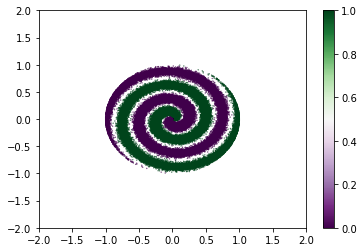

In [5]:
a, b, c, d, e, f, g = ib.get_testpdfSpiral(100000, noise=.9, K=2)#generate_spirals(750, K=2)
plt.scatter(a[:,0],a[:,1], c=c, cmap=cmap, s=0.1)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.colorbar()

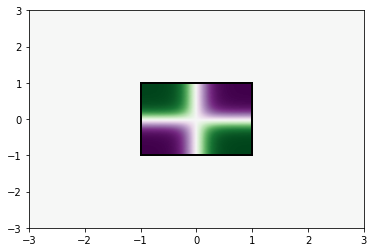

In [7]:
h = 0.01
tempX, tempY, tempC = ib.get_trueXOR(l=-3, r=3, h=h, rotate=False, sig=0.25)

fig, axs = plt.subplots(1,1)

# axs.set_xticks([])
# axs.set_yticks([])
axs.set_xlim(np.multiply([-3,3], 1))
axs.set_ylim(np.multiply([-3,3], 1)) 
axs.scatter(tempX, tempY, c=tempC, s=1, cmap=cmap)
axs.add_patch(Rectangle((-1,-1), 2, 2, linewidth=2, edgecolor='k', fill=False))

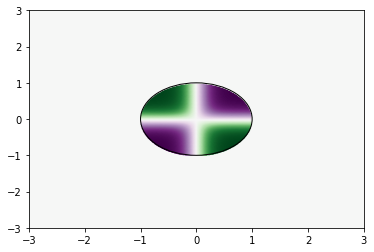

In [8]:
h = 0.01
tempX, tempY, tempC = ib.get_trueXOR(l=-3,r=3, h=h, rotate=False, sig=0.25, cc=True)

fig, axs = plt.subplots(1,1)

axs.set_xlim(np.multiply([-3,3], 1))
axs.set_ylim(np.multiply([-3,3], 1)) 
axs.scatter(tempX, tempY, c=tempC, s=1, cmap=cmap)
axs.add_patch(Circle((0,0), radius=1, edgecolor='k', fill=False))

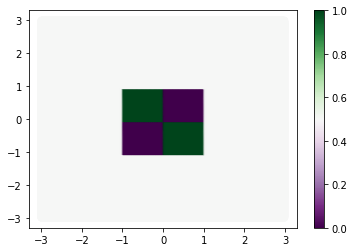

In [6]:
h = 0.01
tempX, tempY, tempC = ib.get_trueUXOR(l=-3, r=3, h=h)
plt.scatter(tempX, tempY, c=tempC, cmap=cmap)
plt.colorbar()

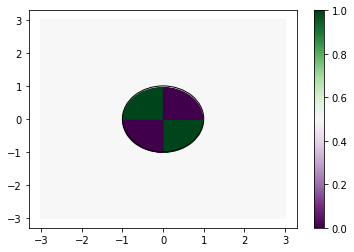

In [7]:
h = 0.01
tempX, tempY, tempC = ib.get_trueUXOR(l=-3, r=3, h=h, cc=True)
fig, axs = plt.subplots(1,1)

pms = axs.scatter(tempX, tempY, c=tempC, s=1, cmap=cmap)
axs.add_patch(Circle((0,0), radius=1, edgecolor='k', fill=False))
fig.colorbar(pms)

In [5]:
from src.dataset_loader import datasetLoader

In [6]:
dl = datasetLoader()

array([[ 0.24282605,  0.62008045],
       [ 0.24282605,  0.62008045],
       [ 0.36240855,  0.2979072 ],
       ...,
       [ 0.50368965,  0.10318447],
       [ 0.14828241, -0.41929358],
       [-0.3424671 , -0.58365085]])